<a href="https://colab.research.google.com/github/Odaleia22/analisando-dados-do-Titanic/blob/main/analise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analisando dataset Titanic

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic=sns.load_dataset("titanic")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
numero_colunas=titanic.shape[1]

In [7]:
print("Quantidade de colunas:", numero_colunas)

Quantidade de colunas: 15


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##Tradução


In [10]:
# Criando o dicionário de tradução
dicionario_traducao = {
    'survived': 'sobreviveu',
    'pclass': 'classe_passagem',
    'sex': 'sexo',
    'age': 'idade',
    'sibsp': 'irmãos_cônjuges',
    'parch': 'pais_filhos',
    'fare': 'tarifa',
    'embarked': 'embarcou',
    'class': 'classe',
    'who': 'gênero',
    'adult_male': 'adulto_masculino',
    'deck': 'convés',
    'embark_town': 'porto_de_embarque',
    'alive': 'vivo',
    'alone': 'sozinho'
}

# Renomeando as colunas do DataFrame
titanic_renomeado = titanic.rename(columns=dicionario_traducao) ## Usei o método rename para renomear


##Tratamento de dados

In [11]:
valores_unicos = {coluna: titanic_renomeado[coluna].unique() for coluna in titanic_renomeado.columns}

In [12]:
for coluna, valores in valores_unicos.items():
    print(f"Valores únicos na coluna '{coluna}': {valores}")

Valores únicos na coluna 'sobreviveu': [0 1]
Valores únicos na coluna 'classe_passagem': [3 1 2]
Valores únicos na coluna 'sexo': ['male' 'female']
Valores únicos na coluna 'idade': [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Valores únicos na coluna 'irmãos_cônjuges': [1 0 3 4 2 5 8]
Valores únicos na coluna 'pais_filhos': [0 1 2 5 3 4 6]
Valores únicos na coluna 'tarifa': [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      2

In [13]:
titanic_renomeado['sobreviveu'] = titanic_renomeado['sobreviveu'].map({1: 'sim', 0: 'não'})

In [14]:
titanic_renomeado['tarifa'] = titanic_renomeado['tarifa'].round(2) ## arredondei as casa decimais para 2 após a virgula

In [15]:
titanic_renomeado['idade'].fillna(0, inplace=True)


In [16]:
titanic_renomeado['idade']= titanic_renomeado['idade'].astype(int)

In [17]:
titanic_renomeado.head()

,sobreviveu,classe_passagem,sexo,idade,irmãos_cônjuges,pais_filhos,tarifa,embarcou,classe,gênero,adulto_masculino,convés,porto_de_embarque,vivo,sozinho
0,não,3,male,22,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,sim,1,female,38,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,sim,3,female,26,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,sim,1,female,35,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,não,3,male,35,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# Identificando linhas em branco
linhas_em_branco = titanic_renomeado.isnull().any(axis=1)## 'axis=1' no pandas se refere às colunas  ## posso pesquisar any ou all

# Exibindo as linhas em branco
print(titanic_renomeado[linhas_em_branco])

    sobreviveu  classe_passagem    sexo  idade  irmãos_cônjuges  pais_filhos  \
0          não                3    male     22                1            0   
2          sim                3  female     26                0            0   
4          não                3    male     35                0            0   
5          não                3    male      0                0            0   
7          não                3    male      2                3            1   
..         ...              ...     ...    ...              ...          ...   
884        não                3    male     25                0            0   
885        não                3  female     39                0            5   
886        não                2    male     27                0            0   
888        não                3  female      0                1            2   
890        não                3    male     32                0            0   

     tarifa embarcou  classe gênero  ad

In [19]:
titanic_renomeado.head()

,sobreviveu,classe_passagem,sexo,idade,irmãos_cônjuges,pais_filhos,tarifa,embarcou,classe,gênero,adulto_masculino,convés,porto_de_embarque,vivo,sozinho
0,não,3,male,22,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,sim,1,female,38,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,sim,3,female,26,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,sim,1,female,35,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,não,3,male,35,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


## Análise exploratória


**Objetivo:** evidenciar a relação entre a desigualdade social e a quantidade de mortos e sobreviventes do caso Titanic

**Hipótese**

A quantidade de pessoas que sobreviveram é maior em classes mais abastadas.

**Questõespara análise exploratória:**

* Quantas pessoas de cada classe haviam?
* Quantidade de sobreviventes por classe?
* Qual a média de idade de pessoas que sobreviveram?
* Qual a média de pessoas mortas?
* Quantas crianças morreram?
* Qual a cidade que mais embarcou tripulantes?
* Há mais registros sobre os tripulantes de classes mais altas?

In [20]:
media_idade= titanic_renomeado['idade'].mean()
print(media_idade)

23.783389450056116


In [21]:
media_idade_sobreviventes= titanic_renomeado.groupby('sobreviveu')['idade'].mean()
print((media_idade_sobreviventes).astype(int))

sobreviveu
não    23
sim    24
Name: idade, dtype: int64


In [41]:
# prompt: porcentagem das crianças que morreram

criancas_mortas = titanic_renomeado[(titanic_renomeado['idade'] <= 18) & (titanic_renomeado['sobreviveu'] == 'não')].shape[0]
total_criancas = titanic_renomeado[titanic_renomeado['idade'] <= 18].shape[0]
porcentagem_criancas_mortas = (criancas_mortas / total_criancas) * 100
print(f"Porcentagem de crianças que morreram: {porcentagem_criancas_mortas:.2f}%")


Porcentagem de crianças que morreram: 61.39%


In [40]:
#  crianças morreram?

criancas_mortas = titanic_renomeado[(titanic_renomeado['idade'] <= 18) & (titanic_renomeado['sobreviveu'] == 'não')].shape[0]

print(f"Quantidade de crianças mortas: {criancas_mortas}")


Quantidade de crianças mortas: 194


In [22]:
quantidade_de_pessoas_por_classe= titanic_renomeado['classe'].value_counts()
print(quantidade_de_pessoas_por_classe)

classe
Third     491
First     216
Second    184
Name: count, dtype: int64


In [23]:
sobreviventes_por_classe= titanic_renomeado.groupby('classe')['sobreviveu'].value_counts()
print(sobreviventes_por_classe)

classe  sobreviveu
First   sim           136
        não            80
Second  não            97
        sim            87
Third   não           372
        sim           119
Name: count, dtype: int64


In [24]:
pessoas_por_cidade= titanic_renomeado['porto_de_embarque'].value_counts()
print(pessoas_por_cidade)

porto_de_embarque
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


In [25]:
df_nulos_por_convés = titanic_renomeado[titanic_renomeado['convés'].isnull()].groupby('classe').size()
print(df_nulos_por_convés)


classe
First      41
Second    168
Third     479
dtype: int64


In [26]:
mean_fare_by_class = titanic_renomeado.groupby('classe')['tarifa'].mean()
print(mean_fare_by_class)


classe
First     84.154630
Second    20.662174
Third     13.675866
Name: tarifa, dtype: float64


In [27]:
df_group = titanic_renomeado.groupby(['classe', 'porto_de_embarque']).size().unstack() ## Quando você encadeia .size().unstack() após um .groupby(), você está criando uma tabela de contingência que mostra a contagem de elementos em cada grupo para uma combinação específica de valores de índice.
print(df_group)


porto_de_embarque  Cherbourg  Queenstown  Southampton
classe                                               
First                     85           2          127
Second                    17           3          164
Third                     66          72          353


In [28]:
# prompt: df_group = titanic_renomeado.groupby(['classe', 'porto_de_embarque']).size().unstack()  . Quero os resultamdos em porcentagens, comparando com a aquntidade de pessoas em cada classe

df_group_percent = df_group.apply(lambda x: 100 * x / x.sum(), axis=1)
print(df_group_percent)


porto_de_embarque  Cherbourg  Queenstown  Southampton
classe                                               
First              39.719626    0.934579    59.345794
Second              9.239130    1.630435    89.130435
Third              13.441955   14.663951    71.894094


##Gráficos

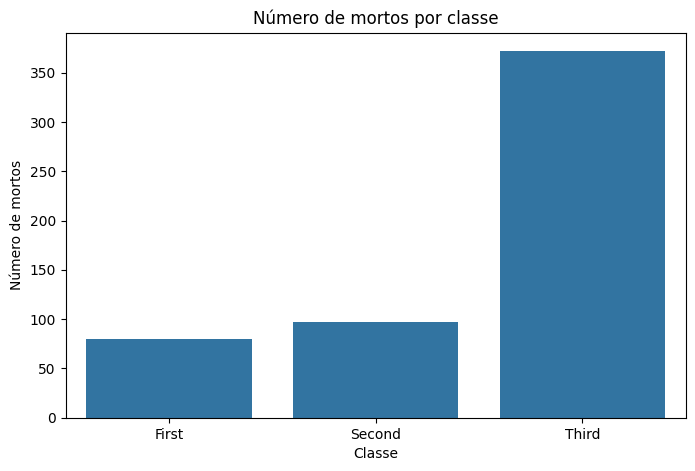

In [29]:
# prompt: gráfico que relaciona o número de mortos pela classe

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar dados por classe e contar o número de mortos
mortes_por_classe = titanic_renomeado.groupby('classe')['sobreviveu'].value_counts().unstack()['não']

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=mortes_por_classe.index, y=mortes_por_classe.values)

# Adicionar título e rótulos dos eixos
plt.title('Número de mortos por classe')
plt.xlabel('Classe')
plt.ylabel('Número de mortos')

# Exibir o gráfico
plt.show()


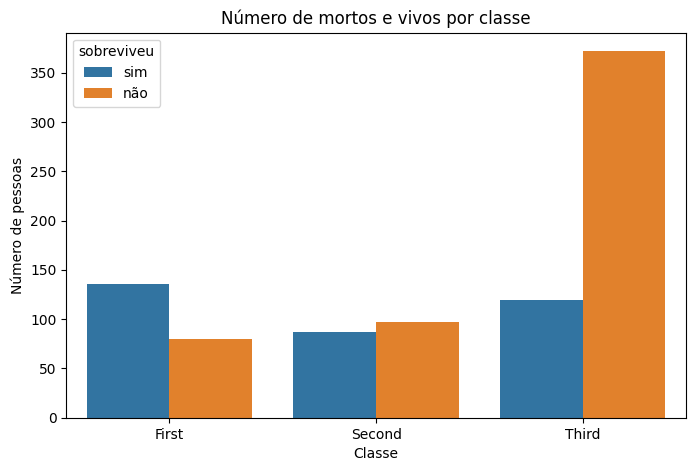

In [30]:
# prompt: gráfico que compara o número de mortos e vivos?

# Agrupar dados por classe e contar o número de mortos e vivos
mortes_vivos_por_classe = titanic_renomeado.groupby('classe')['sobreviveu'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=mortes_vivos_por_classe.index.get_level_values(0),
            y=mortes_vivos_por_classe.values,
            hue=mortes_vivos_por_classe.index.get_level_values(1))

# Adicionar título e rótulos dos eixos
plt.title('Número de mortos e vivos por classe')
plt.xlabel('Classe')
plt.ylabel('Número de pessoas')

# Exibir o gráfico
plt.show()


<Figure size 800x500 with 0 Axes>

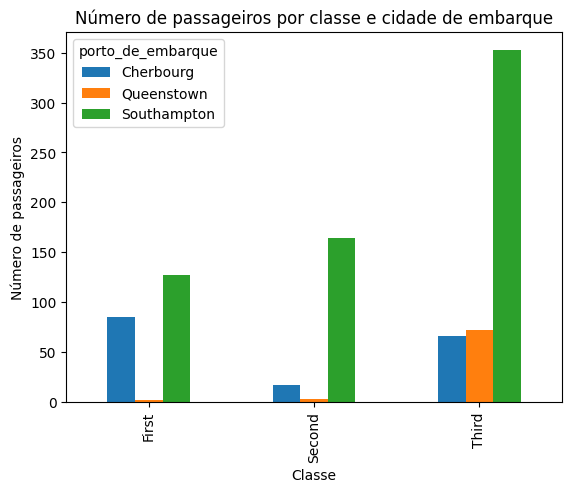

In [31]:
# prompt: gráfico de barras classes por cidades

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar dados por classe e cidade de embarque
df_group = titanic_renomeado.groupby(['classe', 'porto_de_embarque']).size().unstack()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
df_group.plot(kind='bar')

# Adicionar título e rótulos dos eixos
plt.title('Número de passageiros por classe e cidade de embarque')
plt.xlabel('Classe')
plt.ylabel('Número de passageiros')

# Exibir o gráfico
plt.show()


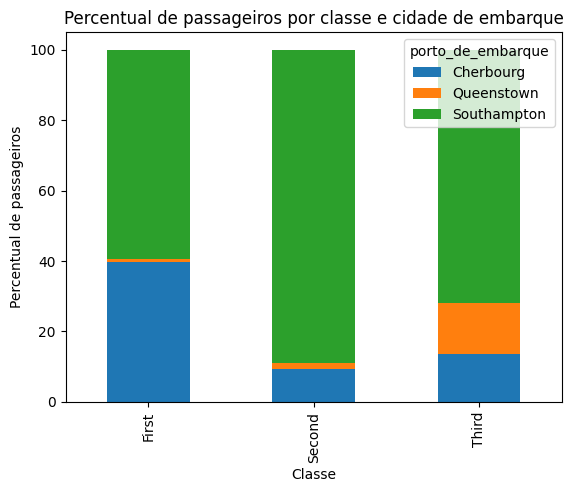

In [32]:
# prompt: crie um gráfico com base em:
# df_group_percent = df_group.apply(lambda x: 100 * x / x.sum(), axis=1)
# print(df_group_percent)

# Criar um gráfico de barras com base em df_group_percent
df_group_percent.plot(kind='bar', stacked=True)

# Adicionar título e rótulos dos eixos
plt.title('Percentual de passageiros por classe e cidade de embarque')
plt.xlabel('Classe')
plt.ylabel('Percentual de passageiros')


# Exibir o gráfico
plt.show()


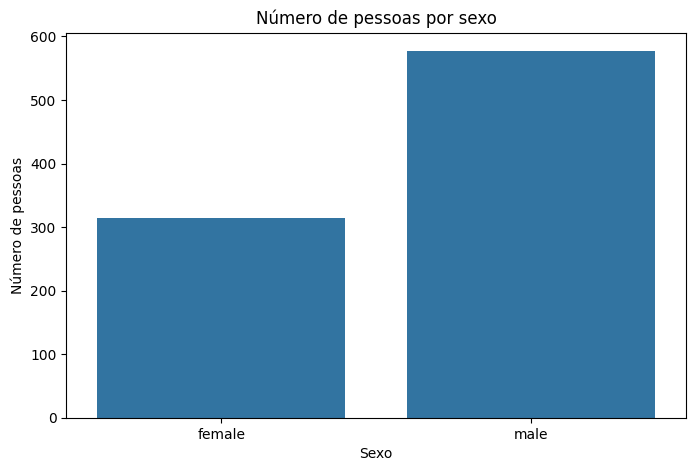

In [33]:
# prompt: gráfico tinha mais mulheres ou mais homens?

# Agrupar dados por sexo e contar o número de pessoas
quantidade_por_sexo = titanic_renomeado.groupby('sexo').size()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=quantidade_por_sexo.index, y=quantidade_por_sexo.values)

# Adicionar título e rótulos dos eixos
plt.title('Número de pessoas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de pessoas')

# Exibir o gráfico
plt.show()


In [34]:
# prompt: quantas pessoas estavam sozinhas e quantas estavam acompanhadas?

df_alone = titanic_renomeado.groupby('sozinho').size()
print(df_alone)


sozinho
False    354
True     537
dtype: int64


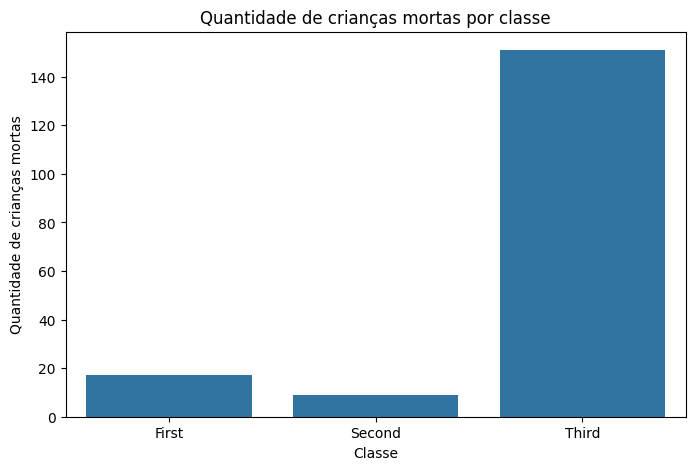

In [35]:
# prompt: gráfico Quantidade de crianças mortas por classe

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar dados por classe e contar o número de crianças mortas
criancas_mortas_por_classe = titanic_renomeado[(titanic_renomeado['idade'] < 18) & (titanic_renomeado['sobreviveu'] == 'não')].groupby('classe').size()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=criancas_mortas_por_classe.index, y=criancas_mortas_por_classe.values)

# Adicionar título e rótulos dos eixos
plt.title('Quantidade de crianças mortas por classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de crianças mortas')

# Exibir o gráfico
plt.show()


In [36]:
# prompt: média idade das crianças mortas por classe

criancas_mortas = titanic_renomeado[(titanic_renomeado['idade'] < 18) & (titanic_renomeado['sobreviveu'] == 'não')]
media_idade_criancas_mortas_por_classe = criancas_mortas.groupby('classe')['idade'].mean()
print(media_idade_criancas_mortas_por_classe)


classe
First     0.117647
Second    3.555556
Third     3.350993
Name: idade, dtype: float64


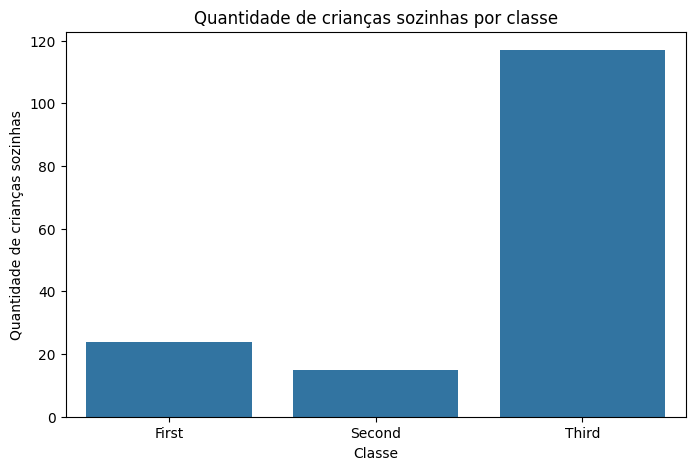

In [37]:
# prompt: gráfico Quantidade de crianças sozinhas por classe

df_criancas_sozinhas = titanic_renomeado[(titanic_renomeado['idade'] < 18) & (titanic_renomeado['sozinho'] == True)].groupby('classe').size()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=df_criancas_sozinhas.index, y=df_criancas_sozinhas.values)

# Adicionar título e rótulos dos eixos
plt.title('Quantidade de crianças sozinhas por classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de crianças sozinhas')

# Exibir o gráfico
plt.show()
